In [93]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import excel data file
plate_test_xls = pd.ExcelFile('PLATE11_Test_Izzy_06222016 Staph Array Data.xlsx');

plate_test_df = plate_test_xls.parse(0, skiprows=1)

plate_test_df

,Sample ID,PSMalpha2,PSMalpha3,psmalpah4,BSA,Betatoxin,hIgA,LDL,SEB,S.Pyogenese arcA,...,HSA,Exoprotein ext,Rabbit IgG,LukF-PV,PSM 4variant,PC4,PNAG,PC16,HLA -2,Tetanus Toxoid
0,10732 V1 100,1282.00,1581.00,1500.50,99.50,11446.00,10105.50,1400.50,10950.50,1119.5,...,373.25,7133.0,5010.00,15795.50,1516.00,182.00,1161.00,580.75,19985.00,16856.50
1,10732 V1 1000,642.25,985.75,601.00,56.00,3344.75,1753.25,748.75,3357.25,727.0,...,191.25,3331.5,5021.50,5696.75,622.50,53.50,557.50,280.50,11660.00,5747.75
2,10732 V1 10000,271.00,323.50,217.00,32.50,1160.00,448.00,216.00,634.00,228.5,...,76.00,872.5,4449.00,1180.50,209.00,63.75,175.50,72.75,2682.00,910.00
3,10732 V1 100000,132.50,146.00,113.50,23.50,508.00,255.00,80.00,165.50,90.5,...,38.00,275.0,4217.00,327.00,111.50,20.00,87.00,40.00,709.00,245.00
4,10732 V2 100,1159.50,1440.75,1401.25,93.75,12377.50,9995.75,1398.00,10720.00,1080.0,...,346.50,6746.0,4927.75,20002.75,1499.50,150.75,1122.25,505.00,19499.50,16762.75
5,10732 V2 1000,731.00,1131.75,812.25,59.00,4949.50,3001.75,980.50,4773.75,834.0,...,226.00,4725.5,4157.75,17637.50,762.75,57.50,738.50,385.00,13612.75,8305.75
6,10732 V2 10000,364.75,492.50,322.50,30.00,1502.75,570.25,315.25,1055.25,376.5,...,93.75,1432.5,4852.00,8773.25,285.00,48.25,246.25,98.50,4803.00,1469.75
7,10732 V2 100000,136.50,158.75,111.75,19.75,508.25,247.00,77.50,174.50,97.0,...,32.25,290.5,4213.75,1747.75,110.00,19.50,86.50,31.00,772.75,271.50


In [94]:
# function to clean up Sample ID column into PatientID, Visit, Dilution columns
def clean_sample_id_column(df_plate):
    # this transforms the troublesome 'Sample ID' column into an array
    column1_array = df_plate['Sample ID'].values

    # taking mark's advice this list comprehension inverts the contents of each element (i.e. cell) in the array
    column1_array = [cell[::-1] for cell in column1_array]

    # cleaning up data
    rex = re.compile(r'(?:(?P<Dilution> *[0]+1) *)?(?:(?P<Visit> *[1-3][v|V] *))?(?P<PatientID>[ |[A-Za-z0-9_]+)')
    outputs = [rex.match(x) for x in column1_array]

    # this takes the named groups from the regular expression above converts everything into a list of dictionaries where
    # the keys are group names (PatientID, Visit and Dilution) and the values are the corresponding string components
    lst_of_dcts = []
    for i, o in enumerate(outputs):
        try:
            lst_of_dcts.append(o.groupdict())
        except:
            print(column1_array[i])

    # up until this point all the values we are interested in are still inverted from the cell[::-1]. This changes them back
    for dct in lst_of_dcts:
        for k, v in dct.items():
            if v == None:
                continue
            else:
                vv = v[::-1].strip()  # added the strip to take away any extra white space still attached
                dct[k] = vv

    # this deletes the old 'SampleID' column
    df_plate.drop('Sample ID', axis=1, inplace=True)

    # This block of code goes through the list of dictionaries and appends the values to a list of their specific category
    # e.g. a dilution of '100' is added to the dilution_list. These lists are then added to the dataframe as columns at
    # the specified index so they are at the front of the dataframe and not slapped on at the end.
    id_list = []
    visit_list = []
    dilution_list = []
    for dct in lst_of_dcts:
        id_list.append(dct['PatientID'])
        visit_list.append(dct['Visit'])
        dilution_list.append(dct['Dilution'])
    df_plate.insert(0, 'PatientID', id_list)
    df_plate.insert(1, 'Visit', visit_list)
    df_plate.insert(2, 'Dilution', dilution_list)

    # return new dataframe
    return df_plate;


In [95]:
clean_plate_test_df = clean_sample_id_column(plate_test_df)

clean_plate_test_df

,PatientID,Visit,Dilution,PSMalpha2,PSMalpha3,psmalpah4,BSA,Betatoxin,hIgA,LDL,...,HSA,Exoprotein ext,Rabbit IgG,LukF-PV,PSM 4variant,PC4,PNAG,PC16,HLA -2,Tetanus Toxoid
0,10732,V1,100,1282.00,1581.00,1500.50,99.50,11446.00,10105.50,1400.50,...,373.25,7133.0,5010.00,15795.50,1516.00,182.00,1161.00,580.75,19985.00,16856.50
1,10732,V1,1000,642.25,985.75,601.00,56.00,3344.75,1753.25,748.75,...,191.25,3331.5,5021.50,5696.75,622.50,53.50,557.50,280.50,11660.00,5747.75
2,10732,V1,10000,271.00,323.50,217.00,32.50,1160.00,448.00,216.00,...,76.00,872.5,4449.00,1180.50,209.00,63.75,175.50,72.75,2682.00,910.00
3,10732,V1,100000,132.50,146.00,113.50,23.50,508.00,255.00,80.00,...,38.00,275.0,4217.00,327.00,111.50,20.00,87.00,40.00,709.00,245.00
4,10732,V2,100,1159.50,1440.75,1401.25,93.75,12377.50,9995.75,1398.00,...,346.50,6746.0,4927.75,20002.75,1499.50,150.75,1122.25,505.00,19499.50,16762.75
5,10732,V2,1000,731.00,1131.75,812.25,59.00,4949.50,3001.75,980.50,...,226.00,4725.5,4157.75,17637.50,762.75,57.50,738.50,385.00,13612.75,8305.75
6,10732,V2,10000,364.75,492.50,322.50,30.00,1502.75,570.25,315.25,...,93.75,1432.5,4852.00,8773.25,285.00,48.25,246.25,98.50,4803.00,1469.75
7,10732,V2,100000,136.50,158.75,111.75,19.75,508.25,247.00,77.50,...,32.25,290.5,4213.75,1747.75,110.00,19.50,86.50,31.00,772.75,271.50


In [96]:
# clean up column headers and reassign
clean_plate_test_df.columns = map(lambda x: x.strip(), clean_plate_test_df.columns);


clean_plate_test_df

,PatientID,Visit,Dilution,PSMalpha2,PSMalpha3,psmalpah4,BSA,Betatoxin,hIgA,LDL,...,HSA,Exoprotein ext,Rabbit IgG,LukF-PV,PSM 4variant,PC4,PNAG,PC16,HLA -2,Tetanus Toxoid
0,10732,V1,100,1282.00,1581.00,1500.50,99.50,11446.00,10105.50,1400.50,...,373.25,7133.0,5010.00,15795.50,1516.00,182.00,1161.00,580.75,19985.00,16856.50
1,10732,V1,1000,642.25,985.75,601.00,56.00,3344.75,1753.25,748.75,...,191.25,3331.5,5021.50,5696.75,622.50,53.50,557.50,280.50,11660.00,5747.75
2,10732,V1,10000,271.00,323.50,217.00,32.50,1160.00,448.00,216.00,...,76.00,872.5,4449.00,1180.50,209.00,63.75,175.50,72.75,2682.00,910.00
3,10732,V1,100000,132.50,146.00,113.50,23.50,508.00,255.00,80.00,...,38.00,275.0,4217.00,327.00,111.50,20.00,87.00,40.00,709.00,245.00
4,10732,V2,100,1159.50,1440.75,1401.25,93.75,12377.50,9995.75,1398.00,...,346.50,6746.0,4927.75,20002.75,1499.50,150.75,1122.25,505.00,19499.50,16762.75
5,10732,V2,1000,731.00,1131.75,812.25,59.00,4949.50,3001.75,980.50,...,226.00,4725.5,4157.75,17637.50,762.75,57.50,738.50,385.00,13612.75,8305.75
6,10732,V2,10000,364.75,492.50,322.50,30.00,1502.75,570.25,315.25,...,93.75,1432.5,4852.00,8773.25,285.00,48.25,246.25,98.50,4803.00,1469.75
7,10732,V2,100000,136.50,158.75,111.75,19.75,508.25,247.00,77.50,...,32.25,290.5,4213.75,1747.75,110.00,19.50,86.50,31.00,772.75,271.50


In [97]:
# group by patient id
patient_id = clean_plate_test_df.groupby("PatientID");
list(patient_id)

[('10732',
    PatientID Visit Dilution  PSMalpha2  PSMalpha3  psmalpah4    BSA  Betatoxin  \
  0     10732    V1      100    1282.00    1581.00    1500.50  99.50   11446.00   
  1     10732    V1     1000     642.25     985.75     601.00  56.00    3344.75   
  2     10732    V1    10000     271.00     323.50     217.00  32.50    1160.00   
  3     10732    V1   100000     132.50     146.00     113.50  23.50     508.00   
  4     10732    V2      100    1159.50    1440.75    1401.25  93.75   12377.50   
  5     10732    V2     1000     731.00    1131.75     812.25  59.00    4949.50   
  6     10732    V2    10000     364.75     492.50     322.50  30.00    1502.75   
  7     10732    V2   100000     136.50     158.75     111.75  19.75     508.25   
  
         hIgA      LDL       ...           HSA  Exoprotein ext  Rabbit IgG  \
  0  10105.50  1400.50       ...        373.25          7133.0     5010.00   
  1   1753.25   748.75       ...        191.25          3331.5     5021.50   
  2  

In [98]:
# list_of_patient_id_df = []    # empty list
# for patient_name, patient_data in patient_id:
#     list_of_patient_id_df.append(patient_data)    # patient_data is a dataframe so this is appending a list of df

# # now we are combining all the df from the groupby to one df
# mergedDF_patient_id = pd.concat(list_of_patient_id_df)    # because all df have same column names, decided to use concat fxn
# mergedDF_patient_id.set_index('PatientID', inplace=True)    # this will change index on the actual df (inplace=True)
# # changed this because when we rewrite it, it will not have duplicates of the index and a column with 'unnamed'

# mergedDF_patient_id    # new patient id df that will be written into a csv

In [99]:
# # writing DF to csv with pandas to_csv function
# mergedDF_patient_id.to_csv('plate_11.csv')

# # checking output to see if it looks okay and is readable
# output_mergedDF = pd.read_csv('plate_11.csv', keep_default_na=False, na_values=[""])

# output_mergedDF

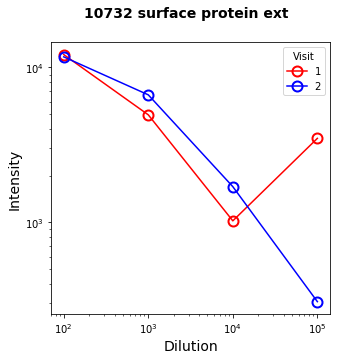

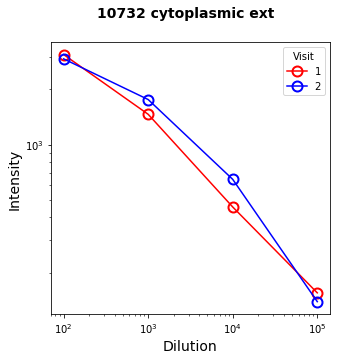

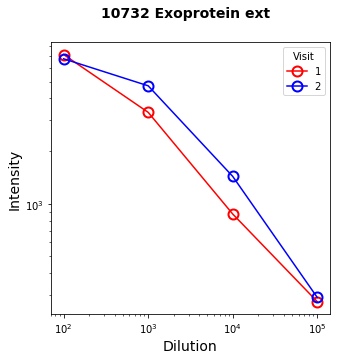

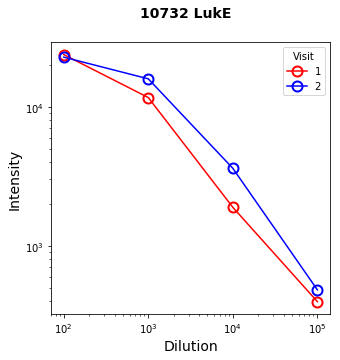

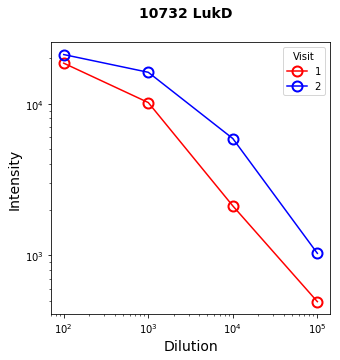

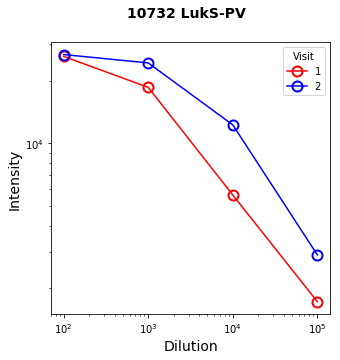

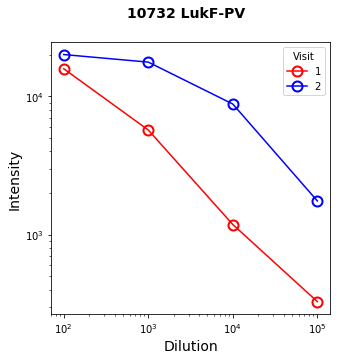

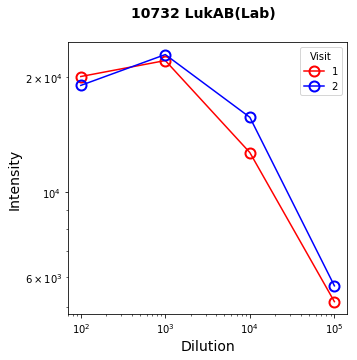

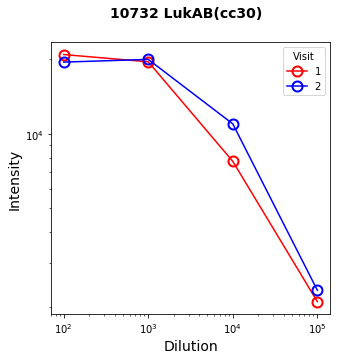

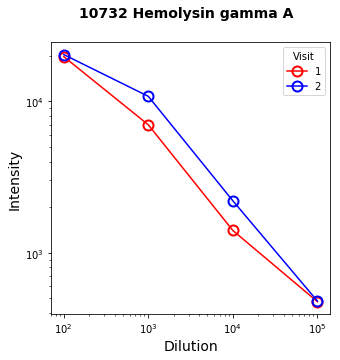

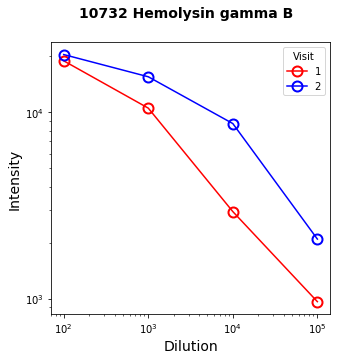

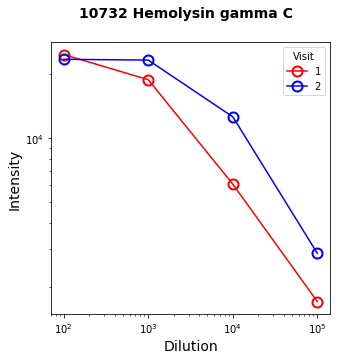

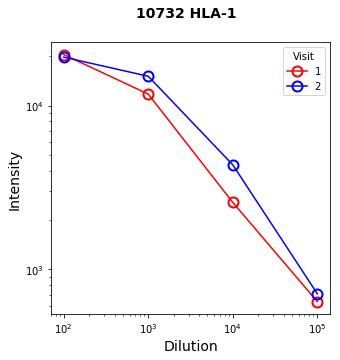

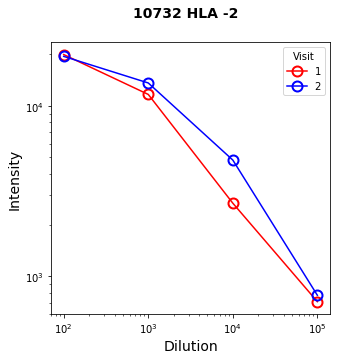

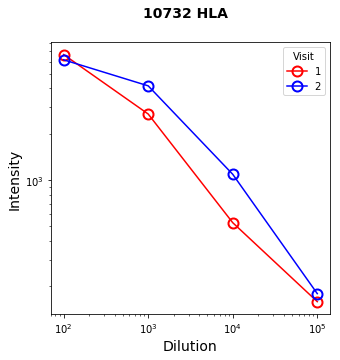

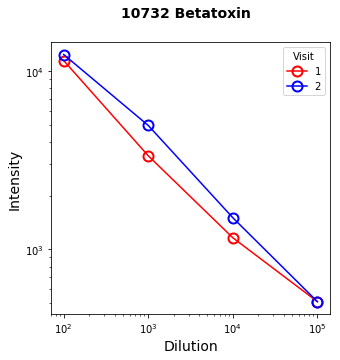

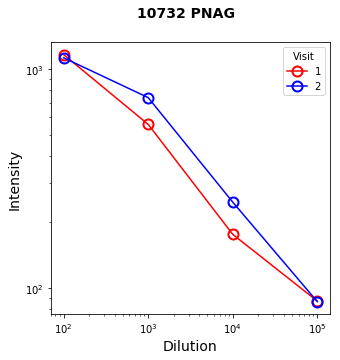

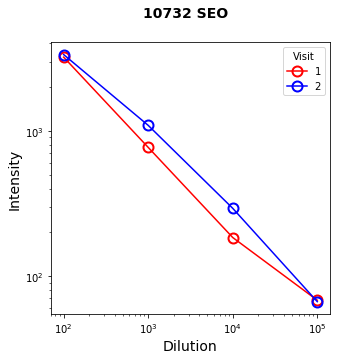

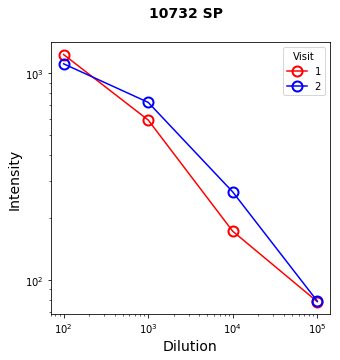

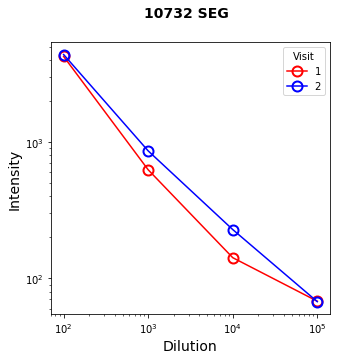

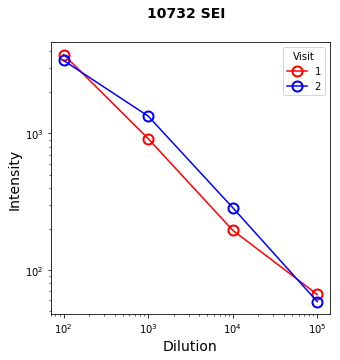

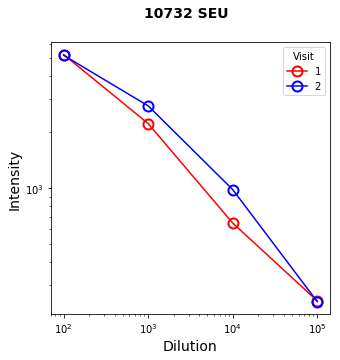

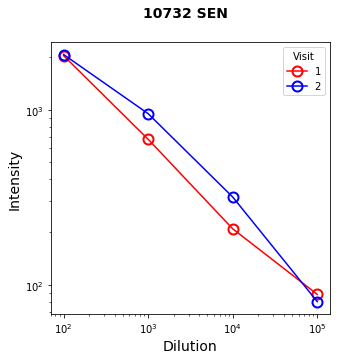

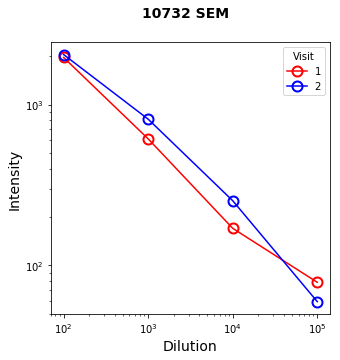

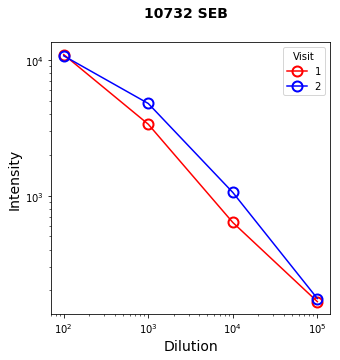

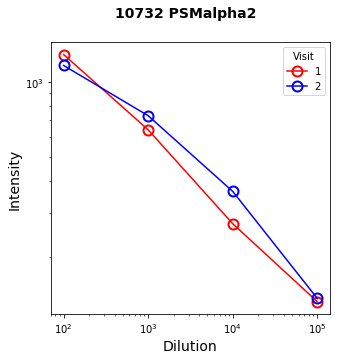

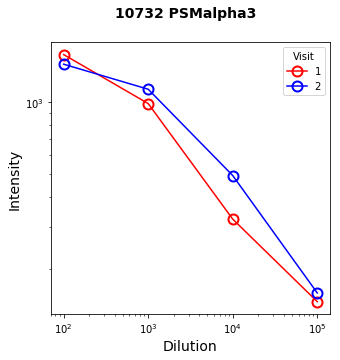

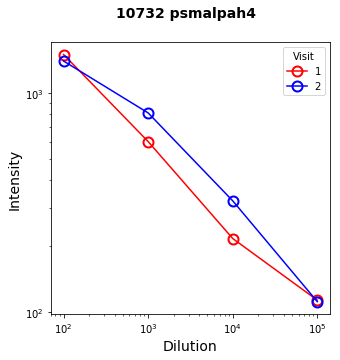

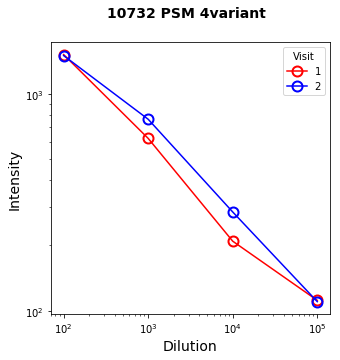

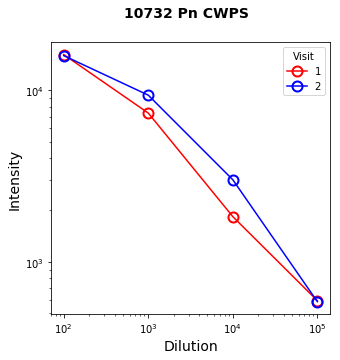

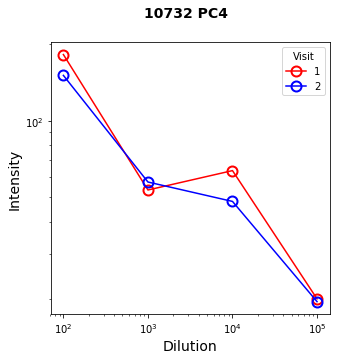

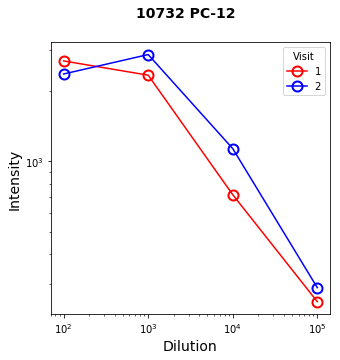

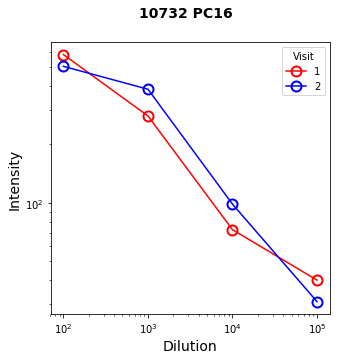

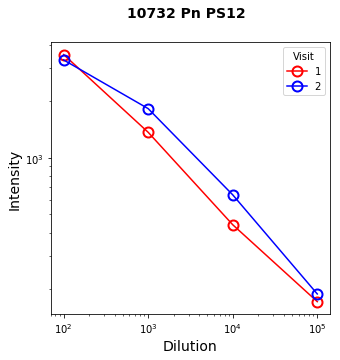

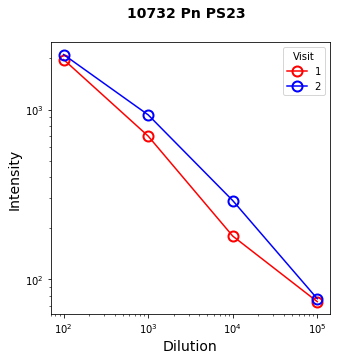

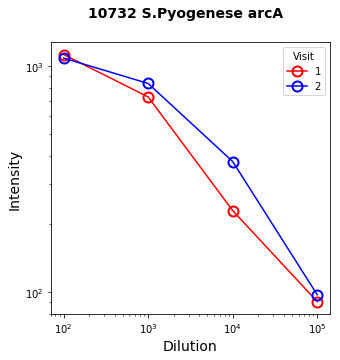

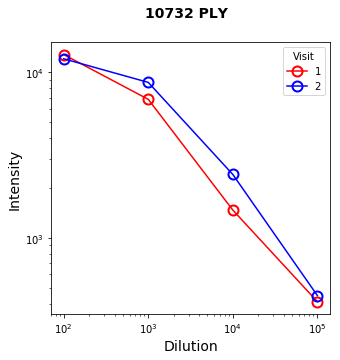

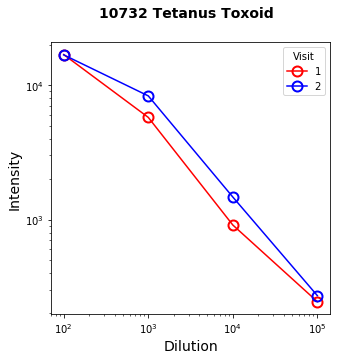

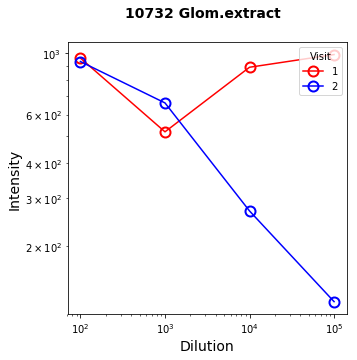

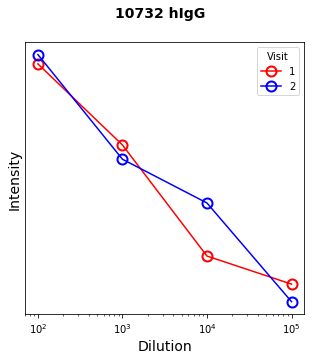

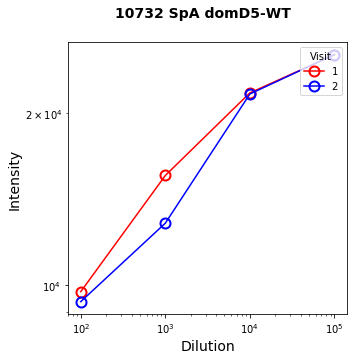

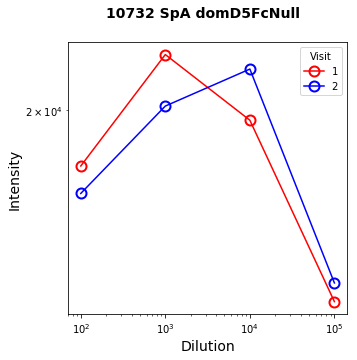

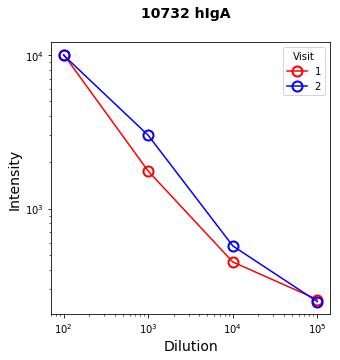

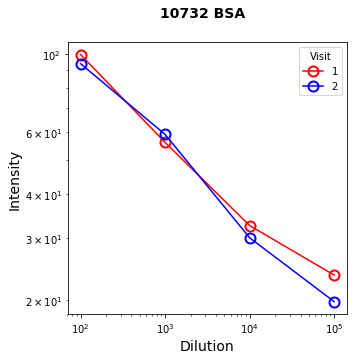

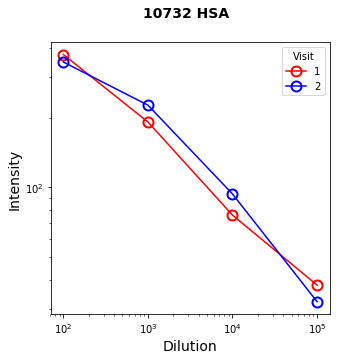

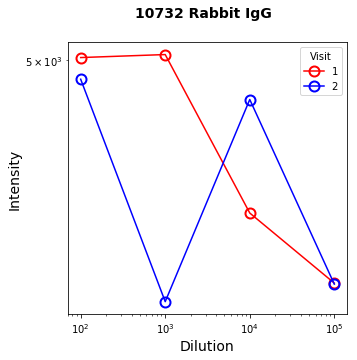

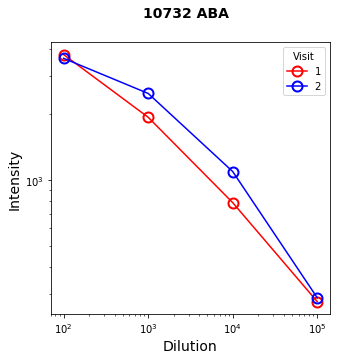

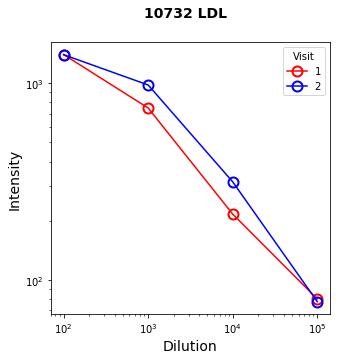

In [105]:
plot_columns = ['surface protein ext', 'cytoplasmic ext', 'Exoprotein ext', 'LukE', 'LukD', 'LukS-PV', 'LukF-PV',
                    'LukAB(Lab)', 'LukAB(cc30)', 'Hemolysin gamma A', 'Hemolysin gamma B', 'Hemolysin gamma C', 'HLA-1',
                    'HLA -2', 'HLA', 'Betatoxin', 'PNAG', 'SEO', 'SP', 'SEG', 'SEI', 'SEU', 'SEN', 'SEM', 'SEB',
                    'PSMalpha2', 'PSMalpha3', 'psmalpah4', 'PSM 4variant', 'Pn CWPS', 'PC4', 'PC-12', 'PC16', 'Pn PS12',
                    'Pn PS23', 'S.Pyogenese arcA', 'PLY', 'Tetanus Toxoid', 'Glom.extract', 'hIgG', 'SpA domD5-WT',
                    'SpA domD5FcNull', 'hIgA', 'BSA', 'HSA', 'Rabbit IgG', 'ABA', 'LDL'];

    # visit number color coding dictionary
visit_color = {"V1": "r", "V2": "b", "V3": "g"};
    
    # group by patient id
for patient_name, patient_data in patient_id:
    for plot_col in plot_columns:
        # set figure and width/height
        plt.figure(figure_num, figsize=(5, 5));
        plt_title = patient_name;

            # if it is a "standard" patient, plot with no other info or visits
        if "Standard" in patient_name:
            patient_name = "Standard";
            plt_title = plt_title + " " + plot_col;
            plt.suptitle(plt_title, fontsize=14, fontweight='bold');
            plt.loglog(patient_data["Dilution"], patient_data[plot_col], color='k',
                           marker='o', markerfacecolor='none',
                           markersize=10,
                           markeredgewidth=2, label="N/A");
        else:
            # create title and assign it
            plt_title = plt_title + " " + plot_col;
            plt.suptitle(plt_title, fontsize=14, fontweight='bold')
            # plot each visit
            visits = patient_data.groupby("Visit");
            for visit_name, visit_data in visits:
                if visit_name == "None":
                    visit_name = "V1";
                    # plotting with log axis, colors according to the visit_color dictionary
                plt.loglog(visit_data["Dilution"], visit_data[plot_col], color=visit_color[visit_name.upper()],
                            marker='o', markerfacecolor='none',
                            markersize=10,
                            markeredgewidth=2, label=visit_name[1]);
            # assigning other misc plot axis and legend information
            plt.xlabel('Dilution', fontsize=14);
            plt.ylabel('Intensity', fontsize=14);
            plt.legend(title="Visit", loc=1);
            plt.show()
